# Imports

In [126]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams

In [127]:
import sklearn
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Getting Dataframe from Data

In [128]:
path = r'C:\Users\Mohit\Desktop\ML-Cricket-Integration-Project\Data\Prepared_for_ML_Data.csv'
player_balls = pd.read_csv(path)

In [129]:
player_balls.head()

,Unnamed: 0,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [130]:
# Removing the Unnamed: 0 column
player_balls.drop(['Unnamed: 0'], axis = 1, inplace = True)
player_balls.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off,Out
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# Random Forest Classification

### Breaking Data into Training and Testing

In [131]:
# Splitting the data randomly between the 4 variables
# Need to drop Out column from X_train and X_test since that's what we are going to predict
# Test size is 0.2 because we want the testing data to be 20% of the original data
train_features, test_features, train_result, test_result = train_test_split(player_balls.drop(['Out'], axis = 1), player_balls['Out'], test_size = 0.20)

In [132]:
train_features.head()

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
9310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1359,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10699,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [133]:
train_result.head()

9310     0
1359     0
18       0
9105     0
10699    0
Name: Out, dtype: int64

In [134]:
print(len(train_result))
print(len(test_result))

8693
2174


### Random Over-sampling Train Set (Expanding Minority)

<AxesSubplot:ylabel='Out'>

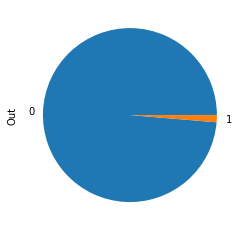

In [135]:
# Since the data is unbalanced, this can lead to a 99% accuracy even though the model has just learned to predict 0
train_result.value_counts().plot.pie()

In [136]:
! pip install -U imbalanced-learn

<AxesSubplot:ylabel='Out'>

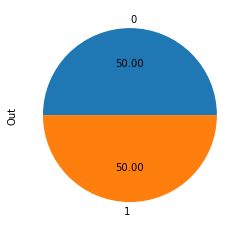

In [137]:
# We are sampling training and test set separately so data doesn't get leaked between both datasets

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
train_features, train_result = smote.fit_resample(train_features, train_result)

train_result.value_counts().plot.pie(autopct='%.2f')

In [138]:
len(train_result)

17156

In [139]:
# There are one hot encoded columns that aren't either 1 or 0 which is a problem
train_features

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
1,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
2,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
4,0.0,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.202690,0.79731,0.000000,0.000000
17152,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.544302,0.455698,0.00000,0.000000,0.000000
17153,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.492283,0.507717,0.000000,0.000000,0.507717,0.00000,0.000000,0.492283
17154,1.0,0.0,0.0,0.0,0.401281,0.598719,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.000000,0.598719,0.401281,0.000000,0.00000,0.000000,0.000000


In [140]:
train_features.columns

Index(['ODI', 'T20', 'Test', 'Australia', 'England', 'India', 'New Zealand',
       'South Africa', 'Sri Lanka', 'USA', 'West Indies', 'left arm fast',
       'left arm legbreak', 'left arm offbreak', 'right arm fast',
       'right arm legbreak', 'right arm offbreak', 'Speed',
       'Length: Back of a Length', 'Length: Full', 'Length: Good',
       'Length: Short', 'Line: Leg Stump', 'Line: Legside',
       'Line: Middle Stump', 'Line: Off Stump', 'Line: Offside',
       'Line: Wide Outside Off'],
      dtype='object')

In [141]:
# Changing the decimal values in the database to binary values
for feature in train_features.columns:
    if (feature == 'Speed'):
        continue

    for i in range(0, len(train_features)):
        curr = train_features[feature].iloc[i]
        
        if (curr > 0.5):
            train_features[feature].iloc[i] = 1
        else:
            train_features[feature].iloc[i] = 0
            
    print(feature)

c:\Users\Mohit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


ODI
T20
Test
Australia
England
India
New Zealand
South Africa
Sri Lanka
USA
West Indies
left arm fast
left arm legbreak
left arm offbreak
right arm fast
right arm legbreak
right arm offbreak
Length: Back of a Length
Length: Full
Length: Good
Length: Short
Line: Leg Stump
Line: Legside
Line: Middle Stump
Line: Off Stump
Line: Offside
Line: Wide Outside Off


In [142]:
# Now there are no decimals in place of the binary numbers
train_features

,ODI,T20,Test,Australia,England,India,New Zealand,South Africa,Sri Lanka,USA,...,Length: Back of a Length,Length: Full,Length: Good,Length: Short,Line: Leg Stump,Line: Legside,Line: Middle Stump,Line: Off Stump,Line: Offside,Line: Wide Outside Off
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17152,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17153,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
17154,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Training the Model

In [143]:
rfc = RandomForestClassifier()
rfc.fit(train_features, train_result)

RandomForestClassifier()

# Model Evaluation

In [144]:
rfc_predict = rfc.predict(test_features)

### Classification Report without Cross-Validation

In [145]:
print(classification_report(test_result, rfc_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2143
           1       0.03      0.06      0.04        31

    accuracy                           0.95      2174
   macro avg       0.51      0.52      0.51      2174
weighted avg       0.97      0.95      0.96      2174



### K-Fold Cross-Validation & Confusion Matrices

In [146]:
Y_train_pred = cross_val_predict(rfc, train_features, train_result, cv = 5)
train_accuracy = metrics.accuracy_score(train_result, rfc.predict(train_features))

print('Training Data Confusion Matrix: \n', confusion_matrix(train_result, Y_train_pred))
print('\nTrain Accuracy: ', train_accuracy)
print('Train Precision: ', precision_score(train_result, Y_train_pred))

Training Data Confusion Matrix: 
 [[8280  298]
 [  17 8561]]

Train Accuracy:  0.9856027045931453
Train Precision:  0.9663618918613839


In [147]:
Y_test_pred = cross_val_predict(rfc, test_features, test_result, cv = 5)
test_accuracy = metrics.accuracy_score(test_result, rfc_predict)

print('Test Data Confusion Matrix: \n', confusion_matrix(test_result, Y_test_pred))
print('\nTest Accuracy: ', test_accuracy)
print('Test Precision: ', precision_score(test_result, Y_test_pred))

Test Data Confusion Matrix: 
 [[2138    5]
 [  31    0]]

Test Accuracy:  0.953541858325667
Test Precision:  0.0


# Making a Test Prediction

In [148]:
getting_ball = pd.Series.to_numpy(player_balls.iloc[5000]).reshape(1, -1)
sample_ball = getting_ball[0][0:28].reshape(1, -1)
sample_ball

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1., 77.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.]])

In [149]:
rfc.predict(sample_ball) # the prediction

c:\Users\Mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [150]:
rfc.predict_proba(sample_ball)

c:\Users\Mohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])